In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Classified Data')#index_col=0)

In [5]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
df=pd.read_csv('Classified Data',index_col=0)

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [13]:
scaler.fit(df.drop("TARGET CLASS",axis=1))

StandardScaler()

In [14]:
scaledfeatures=scaler.transform(df.drop("TARGET CLASS",axis=1))

In [15]:
scaledfeatures

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
df_fea=pd.DataFrame(scaledfeatures,columns=df.columns[:-1])

In [19]:
df_fea.isnull().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   WTT     1000 non-null   bool 
 1   PTI     1000 non-null   bool 
 2   EQW     1000 non-null   bool 
 3   SBI     1000 non-null   bool 
 4   LQE     1000 non-null   bool 
 5   QWG     1000 non-null   bool 
 6   FDJ     1000 non-null   bool 
 7   PJF     1000 non-null   bool 
 8   HQE     1000 non-null   bool 
 9   NXJ     1000 non-null   bool 
dtypes: bool(10)
memory usage: 9.9 KB


In [28]:
df_fea.head() #DAta is scaled and ready

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test= train_test_split(df_fea,df['TARGET CLASS'],test_size=0.3,random_state=101)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn=KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
knnpred = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(knnpred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       166
           1       0.89      0.94      0.92       134

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [38]:
print(confusion_matrix(knnpred,y_test))

[[151  15]
 [  8 126]]


In [42]:
error=[]
for i in range(1,41):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error')

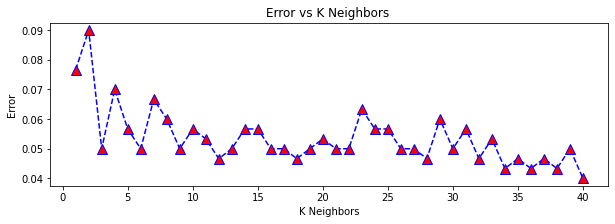

In [50]:
plt.figure(figsize=(10,3))
plt.plot(range(1,41),error,ls='--',color='blue',marker='^',markerfacecolor='red',markersize=10)
plt.title('Error vs K Neighbors ')
plt.xlabel('K Neighbors')
plt.ylabel('Error')

In [57]:
for i in range(len(error)):
    if error[i]==0.04:
        val=i
        break

In [58]:
val

39

In [60]:
knn=KNeighborsClassifier(39)
knn.fit(X_train,y_train)
pred_i=knn.predict(X_test)
print(classification_report(pred_i,y_test))
print(confusion_matrix(pred_i,y_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       158
           1       0.95      0.94      0.95       142

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

[[151   7]
 [  8 134]]
